In [42]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020", "Neutrons_Sliced", "Reduced5MSteps")

fileinprefix = "SlicedDetections*100mmCylinder_01MeV*SHORT5MSTEPS.csv"
df_ar41_100cylinder_01Mev = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.columns[:-1]]

print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 1 files wt prefix:
SlicedDetections*100mmCylinder_01MeV*SHORT5MSTEPS.csv

[Info] Loaded data in 26.448 seconds


In [6]:
# select a random event: eventnumber==87
event = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.eventnumber==87]

In [27]:
nzero_deteff_steps = event[event.detectionefficiency>0]

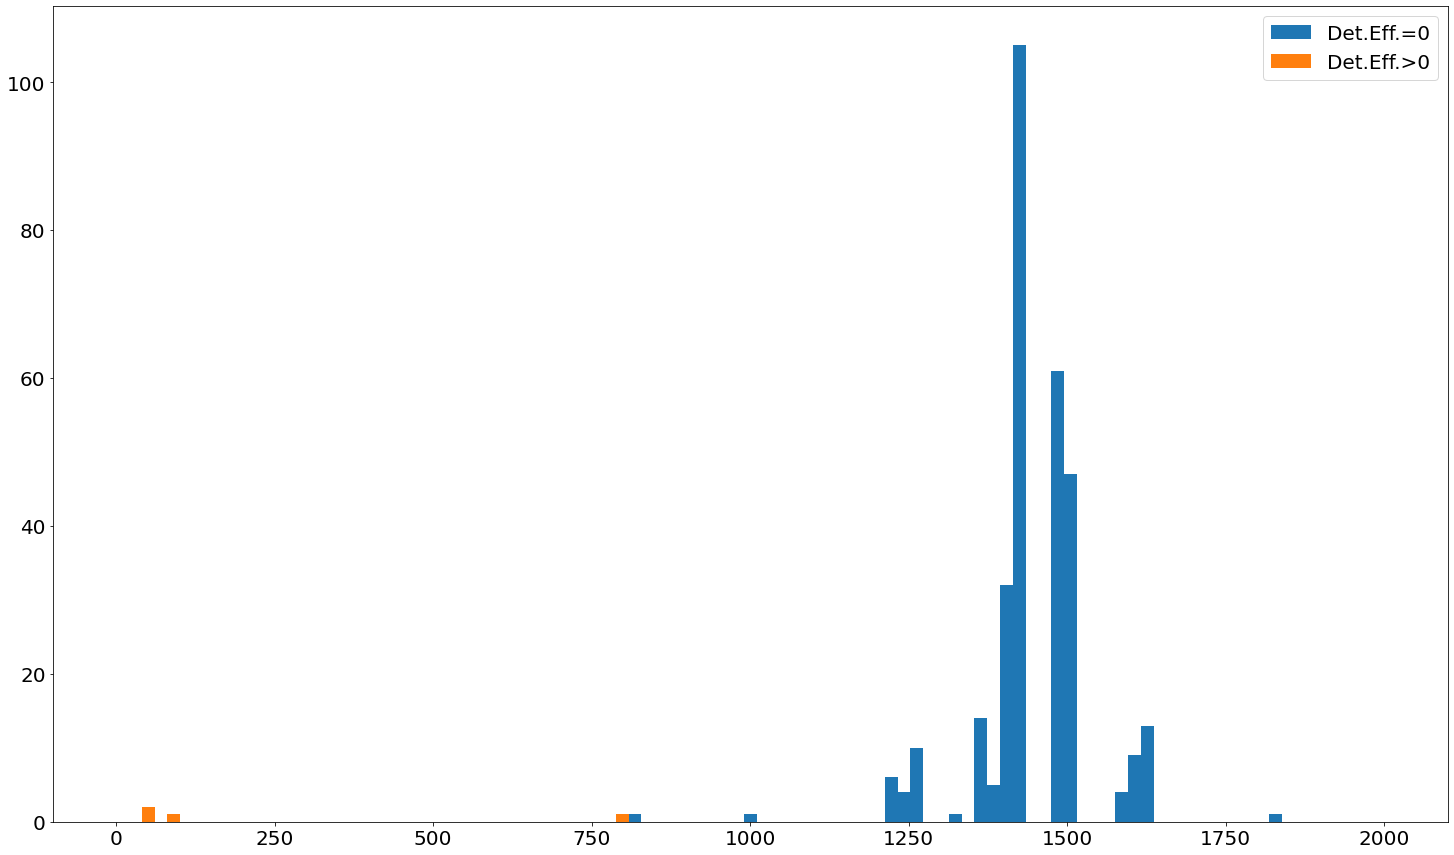

In [31]:
bins = np.linspace(0, 2000, 100)
plt.hist((event.x**2 + event.y**2 + event.z**2)**.5, bins=bins, label="Det.Eff.=0")
plt.hist((nzero_deteff_steps.x**2 + nzero_deteff_steps.y**2 + nzero_deteff_steps.z**2)**.5, bins=bins, label="Det.Eff.>0")
plt.legend()
plt.show()

In [36]:
event[event.PID==2112]

,eventnumber,PID,time,x,y,z,r,material,energydeposition,pedetected,...,OuterSlice10,OuterSlice11,OuterSlice12,OuterSlice13,OuterSlice14,OuterSlice15,OuterSlice16,OuterSlice17,OuterSlice18,OuterSlice19
332,87,2112,0.000000,42.158342,-11.800973,30.971731,43.778862,ArgonLiquid,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
333,87,2112,0.000000,42.158342,-11.800973,30.971731,43.778862,ArgonLiquid,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
334,87,2112,52.372067,-58.781428,-58.148448,-49.749299,82.683119,ArgonLiquid,2.366303,0,...,0,0,0,0,0,0,0,0,0,0
335,87,2112,937.428002,-525.320519,26.300942,639.645082,525.978504,ArgonLiquid,0.078995,0,...,0,0,0,0,0,0,0,0,0,0
336,87,2112,1055.153363,-521.616920,-17.130523,608.608266,521.898138,ArgonLiquid,0.071925,0,...,0,0,0,0,0,0,0,0,0,0
337,87,2112,2045.761144,-682.351963,-128.091980,997.331160,694.270665,ArgonLiquid,0.050130,0,...,0,0,0,0,0,0,0,0,0,0
338,87,2112,6826.392661,-673.862019,-631.875334,377.845121,923.772948,ArgonLiquid,0.002074,0,...,0,0,0,0,0,0,0,0,0,0
339,87,2112,9566.377025,-953.089401,-909.946480,161.086930,1317.718484,ArgonLiquid,0.003091,0,...,0,0,0,0,0,0,0,0,0,0
340,87,2112,10243.023664,-959.659526,-1016.200352,188.166893,1397.715837,ArgonLiquid,0.004874,0,...,0,0,0,0,0,0,0,0,0,0
341,87,2112,11358.037349,-998.629274,-1048.919619,358.558940,1448.272349,ArgonLiquid,0.002000,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_ar41_100cylinder_01Mev.columns

Index(['eventnumber', 'PID', 'time', 'x', 'y', 'z', 'r', 'material',
       'energydeposition', 'pedetected', 'detectionefficiency',
       'quantumefficiency', 'InnerSlice0', 'InnerSlice1', 'InnerSlice2',
       'InnerSlice3', 'InnerSlice4', 'InnerSlice5', 'InnerSlice6',
       'InnerSlice7', 'InnerSlice8', 'InnerSlice9', 'InnerSlice10',
       'InnerSlice11', 'OuterSlice0', 'OuterSlice1', 'OuterSlice2',
       'OuterSlice3', 'OuterSlice4', 'OuterSlice5', 'OuterSlice6',
       'OuterSlice7', 'OuterSlice8', 'OuterSlice9', 'OuterSlice10',
       'OuterSlice11', 'OuterSlice12', 'OuterSlice13', 'OuterSlice14',
       'OuterSlice15', 'OuterSlice16', 'OuterSlice17', 'OuterSlice18',
       'OuterSlice19'],
      dtype='object')

# Looking for event

In [38]:
df = df_ar41_100cylinder_01Mev

In [40]:
df.columns

Index(['eventnumber', 'PID', 'time', 'x', 'y', 'z', 'r', 'material',
       'energydeposition', 'pedetected', 'detectionefficiency',
       'quantumefficiency', 'InnerSlice0', 'InnerSlice1', 'InnerSlice2',
       'InnerSlice3', 'InnerSlice4', 'InnerSlice5', 'InnerSlice6',
       'InnerSlice7', 'InnerSlice8', 'InnerSlice9', 'InnerSlice10',
       'InnerSlice11', 'OuterSlice0', 'OuterSlice1', 'OuterSlice2',
       'OuterSlice3', 'OuterSlice4', 'OuterSlice5', 'OuterSlice6',
       'OuterSlice7', 'OuterSlice8', 'OuterSlice9', 'OuterSlice10',
       'OuterSlice11', 'OuterSlice12', 'OuterSlice13', 'OuterSlice14',
       'OuterSlice15', 'OuterSlice16', 'OuterSlice17', 'OuterSlice18',
       'OuterSlice19'],
      dtype='object')

In [41]:
df.tracknumber.unique()

AttributeError: 'DataFrame' object has no attribute 'tracknumber'